<a href="https://colab.research.google.com/github/PHARAOH-star/Comparative-Analysis-of-European-Option-Pricing-using-Binomial-Trees-and-Black-Scholes-Model-/blob/main/Comparative_Analysis_of_European_Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm


Implementing the Black-scholes Model

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return price


 Implement the Binomial Tree Model

In [ ]:
def binomial_tree(S, K, T, r, sigma, N=100, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Price tree
    ST = np.array([S * u**j * d**(N - j) for j in range(N + 1)])

    if option_type == 'call':
        option_values = np.maximum(ST - K, 0)
    else:
        option_values = np.maximum(K - ST, 0)

    # Backward induction
    for i in range(N - 1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[1:i+2] + (1 - p) * option_values[0:i+1])

    return option_values[0]


Comparing the Mathematical assumptions of both models

- Black-Scholes:
  - Continuous time
  - Constant volatility
  - Log-normal distribution
- Binomial Tree:
  - Discrete time steps
  - Approximates real dynamics as N → ∞

Analysing Convergence of both Models

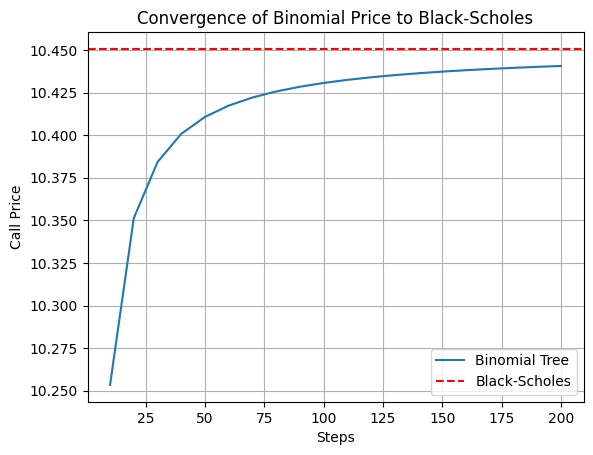

In [ ]:
steps = list(range(10, 201, 10))
bt_prices = [binomial_tree(100, 100, 1, 0.05, 0.2, N=n, option_type='call') for n in steps]
bs_price = black_scholes(100, 100, 1, 0.05, 0.2)

plt.plot(steps, bt_prices, label='Binomial Tree')
plt.axhline(y=bs_price, color='red', linestyle='--', label='Black-Scholes')
plt.xlabel('Steps')
plt.ylabel('Call Price')
plt.legend()
plt.title('Convergence of Binomial Price to Black-Scholes')
plt.grid()
plt.show()


Evaluating model sensitivity with key parameters

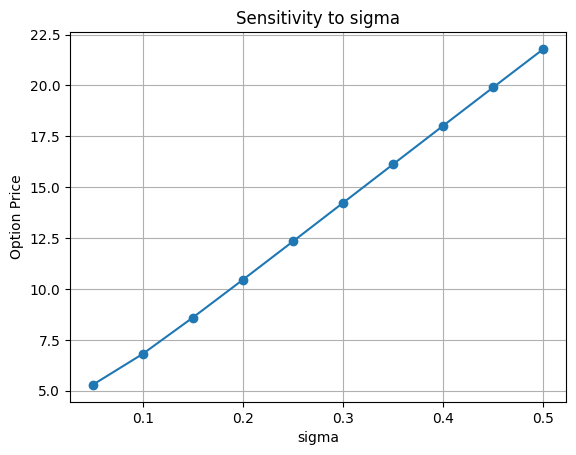

In [ ]:
def sensitivity_plot(param, values, model='black_scholes'):
    S, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
    prices = []

    for v in values:
        kwargs = dict(S=S, K=K, T=T, r=r, sigma=sigma, option_type='call')
        kwargs[param] = v
        if model == 'black_scholes':
            prices.append(black_scholes(**kwargs))
        else:
            prices.append(binomial_tree(**kwargs))

    plt.plot(values, prices, marker='o')
    plt.title(f"Sensitivity to {param}")
    plt.xlabel(param)
    plt.ylabel("Option Price")
    plt.grid(True)
    plt.show()

# Example usage:
sensitivity_plot('sigma', np.linspace(0.05, 0.5, 10))

Comparison with real data

<Axes: title={'center': 'AAPL Closing Prices'}, xlabel='Date'>

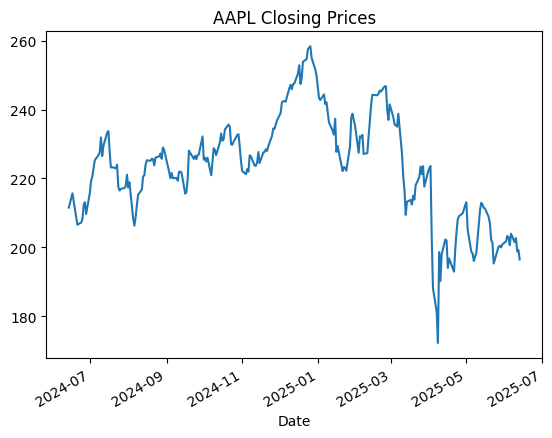

In [ ]:
def fetch_data(ticker='AAPL'):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="1y")
    return hist

# Example
df = fetch_data('AAPL')
df['Close'].plot(title="AAPL Closing Prices")

Implementing both models for a real life sceniaro from yahoo-finance options chain, Contract name : APL250620C00200000

- link : https://finance.yahoo.com/quote/AAPL/options


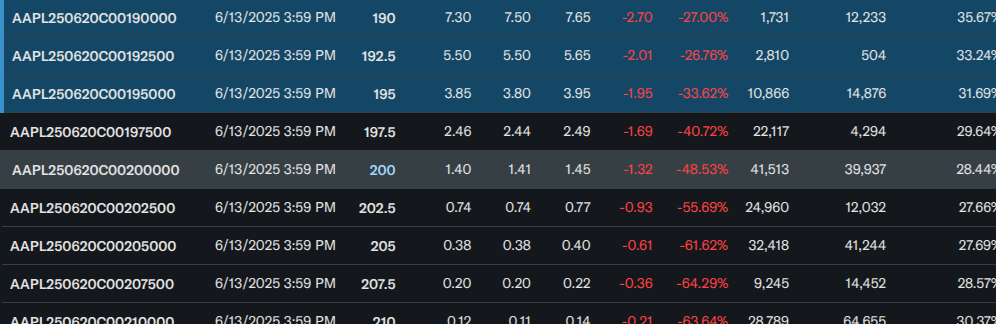

In [100]:
S = 195.00         # Underlying stock price
K = 200.00         # Strike price
T = 7 / 365        # Time to maturity in years
r = 0.05           # Risk-free interest rate (5%)
sigma = 0.2844     # Implied volatility
market_price = 1.43  # Mid-price from bid/ask

# Model outputs
bs_price = black_scholes(S, K, T, r, sigma, option_type='call')
bt_price = binomial_tree(S, K, T, r, sigma, N=100, option_type='call')

# Show all prices
print(f"Market Price     : {market_price:.2f}")
print(f"Black-Scholes    : {bs_price:.2f}")
print(f"Binomial Tree    : {bt_price:.2f}")


Market Price     : 1.43
Black-Scholes    : 1.27
Binomial Tree    : 1.27


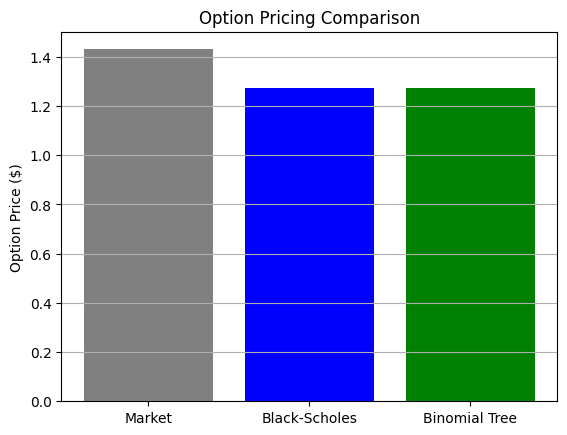

In [102]:
methods = ['Market', 'Black-Scholes', 'Binomial Tree']
prices = [market_price, bs_price, bt_price]

plt.bar(methods, prices, color=['grey', 'blue', 'green'])
plt.title('Option Pricing Comparison')
plt.ylabel('Option Price ($)')
plt.grid(True, axis='y')
plt.show()


Error for both Models

In [103]:
bs_error = abs(bs_price - market_price)
bt_error = abs(bt_price - market_price)

print(f"Black-Scholes Error: {bs_error:.4f}")
print(f"Binomial Tree Error: {bt_error:.4f}")

Black-Scholes Error: 0.1578
Binomial Tree Error: 0.1567


DETAILED COMPARISON OF THE ONLINE DATA FROM TWO MODELS INCLUDING,
- Price convergence
- Deviation from Market price
- Sensitivity to Volatility

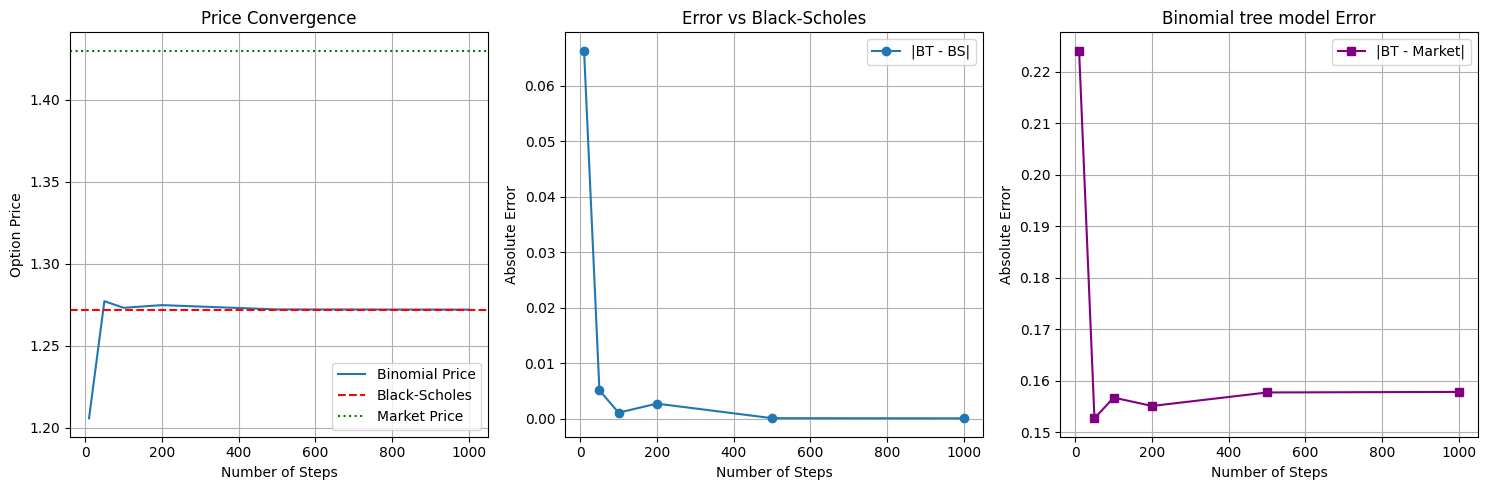

Steps: 10, Binomial: 1.2059, |BT-BS|: 0.0663, |BT-Market|: 0.2241 , Time: 0.13 ms
Steps: 50, Binomial: 1.2773, |BT-BS|: 0.0051, |BT-Market|: 0.1527 , Time: 0.32 ms
Steps: 100, Binomial: 1.2733, |BT-BS|: 0.0011, |BT-Market|: 0.1567 , Time: 0.62 ms
Steps: 200, Binomial: 1.2749, |BT-BS|: 0.0027, |BT-Market|: 0.1551 , Time: 1.34 ms
Steps: 500, Binomial: 1.2723, |BT-BS|: 0.0001, |BT-Market|: 0.1577 , Time: 3.35 ms
Steps: 1000, Binomial: 1.2722, |BT-BS|: 0.0000, |BT-Market|: 0.1578 , Time: 14.36 ms

Black-Scholes Greeks:
Delta: 0.2747
Gamma: 0.0434
Vega: 9.0051
Theta: -69.3848
Rho: 1.0027


In [106]:
def compare_models(S, K, T, r, sigma, steps_list, market_price=None):
    bs_price = black_scholes_call(S, K, T, r, sigma)
    bt_prices = []
    bs_errors = []
    market_errors = []
    times = []

    for steps in steps_list:
        start = time.time()
        bt_price = binomial_tree_call(S, K, T, r, sigma, steps)
        elapsed = time.time() - start
        bt_prices.append(bt_price)
        bs_errors.append(abs(bt_price - bs_price))
        if market_price:
            market_errors.append(abs(bt_price - market_price))
        times.append(elapsed)

    # Plot price convergence
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(steps_list, bt_prices, label='Binomial Price')
    plt.axhline(bs_price, color='r', linestyle='--', label='Black-Scholes')
    if market_price:
        plt.axhline(market_price, color='g', linestyle=':', label='Market Price')
    plt.title('Price Convergence')
    plt.xlabel('Number of Steps')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)

    # Plot error vs Black-Scholes
    plt.subplot(1, 3, 2)
    plt.plot(steps_list, bs_errors, marker='o', label='|BT - BS|')
    plt.title('Error vs Black-Scholes')
    plt.xlabel('Number of Steps')
    plt.ylabel('Absolute Error')
    plt.grid(True)
    plt.legend()

    # Plot error vs Market Price
    if market_price:
        plt.subplot(1, 3, 3)
        plt.plot(steps_list, market_errors, marker='s', color='purple', label='|BT - Market|')
        plt.title('Binomial tree model Error')
        plt.xlabel('Number of Steps')
        plt.ylabel('Absolute Error')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Print performance table
    for i, steps in enumerate(steps_list):
        mp_err = market_errors[i] if market_price else None
        print(f"Steps: {steps}, Binomial: {bt_prices[i]:.4f}, |BT-BS|: {bs_errors[i]:.4f}, "
              f"|BT-Market|: {mp_err:.4f}" if mp_err is not None else "", f", Time: {times[i]*1000:.2f} ms")

    return bs_price, bt_prices

S = 195
K = 200
T = 7 / 365
r = 0.05
sigma = 0.2844
market_price = 1.43
steps_list = [10, 50, 100, 200, 500, 1000]

bs_price, bt_prices = compare_models(S, K, T, r, sigma, steps_list, market_price)

greeks = black_scholes_greeks(S, K, T, r, sigma)
print("\nBlack-Scholes Greeks:")
for name, value in greeks.items():
    print(f"{name}: {value:.4f}")




SENITIVITY TO VOLATILITY

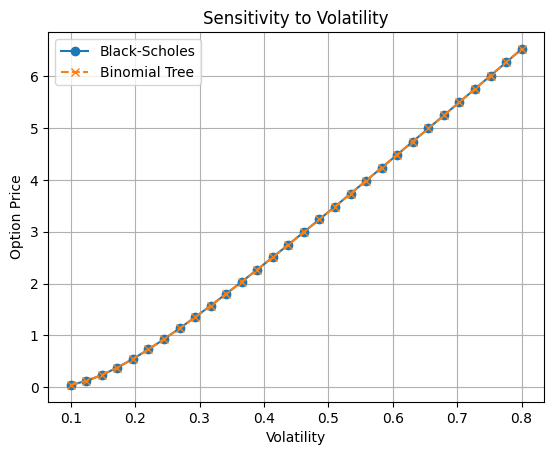

In [105]:
vol_range = np.linspace(0.1, 0.8, 30)
volatility_sensitivity(195, 200, 7/365, 0.05, vol_range)

def volatility_sensitivity(S, K, T, r, vol_range):
    bs_prices = [black_scholes(S, K, T, r, v)[0] for v in vol_range]
    bt_prices = [binomial_tree(S, K, T, r, v, steps=500) for v in vol_range]

    plt.plot(vol_range, bs_prices, label='Black-Scholes')
    plt.plot(vol_range, bt_prices, linestyle='--', label='Binomial Tree')
    plt.xlabel('Volatility')
    plt.ylabel('Option Price')
    plt.title('Sensitivity to Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()



CONCLUSION

- For AAPL250620C00200000 (a short-term call option), the binomial model with ~500+ steps closely approximates the Black-Scholes price.
- Convergence to BS price is evident in error plots as the number of steps increases.
- Volatility sensitivity shows both models behave similarly across a wide range of volatilities.
- Binomial model may be slower, but offers flexibility for expansion.
- The Black-Scholes model is particularly well-suited for pricing European-style options because of the mathematical structure and assumptions it relies on. Here's a breakdown of why it's a good fit.
- Black-Scholes does not account for early exercise, which is a limitation for American options but ideal for European options.
- Assumptions like no arbitrage, continuous trading, constant volatility and interest rate hold reasonably well in the short term and for large, liquid European-style options.
